In [29]:
from qiskit import *
from qiskit import IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')


Raw Image info: (256, 256, 4)
Raw Image datatype: uint8
Image shape (numpy array): (256, 256)


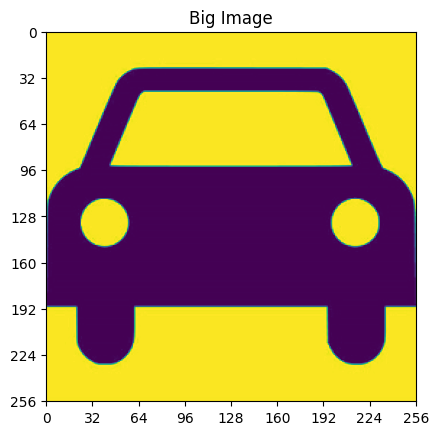

In [3]:
from PIL import Image, ImageOps
style.use('default')

image_size = 256       # Original image-width
image_crop_size = 32   # Width of each part of image for processing


# Load the image from filesystem
image_ip = Image.open("data1/vehicle_256.png")
#pixels = array(image_ip)
image_raw = np.array(Image.open('data1/vehicle_256.png'))
print('Raw Image info:', image_raw.shape)
print('Raw Image datatype:', image_raw.dtype)
#print(pixels)


# Convert the RBG component of the image to B&W image, as a numpy (uint8) array
image = []
for i in range(image_size):
    image.append([])
    for j in range(image_size):
        image[i].append(image_raw[i][j][0] / 255)
            
image = np.array(image)
print('Image shape (numpy array):', image.shape)


# Display the image
plt.title('Big Image')
plt.xticks(range(0, image.shape[0]+1, 32))
plt.yticks(range(0, image.shape[1]+1, 32))
plt.imshow(image, extent=[0, image.shape[0], image.shape[1], 0], cmap='viridis')
plt.show()

In [5]:
# Convert the raw pixel values to probability amplitudes
def amplitude_encode(img_data):
    
    # Calculate the RMS value
    rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
    # Create normalized image
    image_norm = []
    for arr in img_data:
        for ele in arr:
            image_norm.append(ele / rms)
        
    # Return the normalized image as a numpy array
    return np.array(image_norm)

In [6]:
# Initialize some global variable for number of qubits
data_qb = 10
anc_qb = 1
total_qb = data_qb + anc_qb
# Initialize the amplitude permutation unitary
D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)

In [23]:
(imageWidth, imageHeight)=image_ip.size
print(imageWidth) 
gridx=32
gridy=32
rangex=int(256/gridx)
rangey=int(256/gridy)
#imageq = []
print(rangex*rangey)
for x in range(rangex):
   # imageq.append([])
    for y in range(rangey):
        bbox=(x*gridx, y*gridy, x*gridx+gridx, y*gridy+gridy)
        slice_bit=image_ip.crop(bbox)
        slice_bit[i][j] / 255)
        print(slice_bit.size)
        image_slice_size=slice_bit.size
print(imageWidth)
#image = np.array(imageq)
#print('Image shape (numpy array):', imageq.shape)

256
64
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
256
[]


In [ ]:
imageq = []
for i in range(image_size):
    image.append([])
    for j in range(image_size):
        image[i].append(image_raw[i][j][0] / 255)
            
image = np.array(image)
print('Image shape (numpy array):', image.shape)

In [77]:
(imageWidth, imageHeight)=image_ip.size
gridx=32
gridy=32
rangex=int(256/gridx)
rangey=int(256/gridy)
print(rangex*rangey)
for x in range(rangex):
        for y in range(rangey):
            
            # Get the amplitude ancoded pixel values
            # Horizontal: Original image
            image_norm_h = amplitude_encode(rangex[i])

            # Vertical: Transpose of Original image
            image_norm_v = amplitude_encode(rangey[i].T)
                    
            # Create the circuit for horizontal scan
            qc_h = QuantumCircuit(total_qb)
            qc_h.initialize(image_norm_h, range(1, total_qb))
            qc_h.h(0)
            qc_h.unitary(D2n_1, range(total_qb))
            qc_h.h(0)
            display(qc_h.draw('mpl', fold=-1))

            # Create the circuit for vertical scan
            qc_v = QuantumCircuit(total_qb)
            qc_v.initialize(image_norm_v, range(1, total_qb))
            qc_v.h(0)
            qc_v.unitary(D2n_1, range(total_qb))
            qc_v.h(0)
            display(qc_v.draw('mpl', fold=-1))
            # Combine both circuits into a single list
            circ_list = [qc_h, qc_v]
                    
        # Simulating the cirucits
back = Aer.get_backend('statevector_simulator')
results = execute(circ_list, backend=back).result()
sv_h = results.get_statevector(qc_h)
sv_v = results.get_statevector(qc_v)
        


64
Traceback (most recent call last):
  File "/tmp/ipykernel_725/1128317197.py", line 12, in <module>
    image_norm_h = amplitude_encode(rangex[i])
TypeError: 'int' object is not subscriptable

Use %tb to get the full traceback.


In [ ]:
# Simulating the cirucits
back = Aer.get_backend('statevector_simulator')
results = execute(circ_list, backend=back).result()
sv_h = results.get_statevector(qc_h)
sv_v = results.get_statevector(qc_v)

from qiskit.visualization import array_to_latex
print('Horizontal scan statevector:')
display(array_to_latex(sv_h[:30], max_size=30))
print()
print('Vertical scan statevector:')
display(array_to_latex(sv_v[:30], max_size=30))